<a href="https://colab.research.google.com/github/agarwalarpit99/Hackereath-competition-of-identify-the-images-of-GALA/blob/master/Hackerearth_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.utils import to_categorical 
from keras.preprocessing import image 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from tqdm import tqdm

In [0]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/train.csv')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/test.csv')

In [10]:
train.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [106]:
train['Class'].value_counts()

Food                    2278
Attire                  1691
misc                    1271
Decorationandsignage     743
Name: Class, dtype: int64

In [12]:
train['Image'][0]

'image7042.jpg'

In [13]:
train.shape

(5983, 2)

In [173]:
test_image = [] 
for i in tqdm(range(test.shape[0])):
     img = image.load_img('/content/drive/My Drive/Colab Notebooks/dataset/Test Images/'+test['Image'][i], target_size=(100,100,3))
     img = image.img_to_array(img)
     img = img/255
     test_image.append(img)
XT = np.array(test_image)

100%|██████████| 3219/3219 [00:03<00:00, 817.77it/s]


In [174]:
train_image = [] 
for i in tqdm(range(train.shape[0])):
     img = image.load_img('/content/drive/My Drive/Colab Notebooks/dataset/Train Images/'+train['Image'][i], target_size=(100,100,3))
     img = image.img_to_array(img)
     img = img/255
     train_image.append(img)
X = np.array(train_image)

100%|██████████| 5983/5983 [00:09<00:00, 664.07it/s]


Using TensorFlow backend.


In [0]:
from keras.utils import to_categorical
y=train['Class'].values 

 

In [20]:
y

array(['Food', 'misc', 'Attire', ..., 'Food', 'Food', 'Attire'],
      dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train['label']=lb.fit_transform(train['Class']) 

In [27]:
train.head()

,Image,Class,label
0,image7042.jpg,Food,2
1,image3327.jpg,misc,3
2,image10335.jpg,Attire,0
3,image8019.jpg,Food,2
4,image2128.jpg,Attire,0


In [0]:
y=train['label'].values

In [118]:
train['label'].value_counts()

2    2278
0    1691
3    1271
1     743
Name: label, dtype: int64

In [0]:
y=to_categorical(y)

In [120]:
y

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [0]:
X[0]

In [34]:
X.shape

(5983, 28, 28, 1)

In [0]:
model=Sequential()
model.add(Conv2D(96,kernel_size=(3,3),activation='relu',input_shape=(80,80,1)))
model.add(Dropout(0.3))
model.add(Conv2D(128,kernel_size=(3,3)))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(96,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=96,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [123]:
model.fit(X,y,epochs=30,validation_split=0.2)

Train on 4786 samples, validate on 1197 samples
Epoch 1/30
4786/4786 [==============================] - 7s 1ms/step - loss: 1.3583 - acc: 0.3751 - val_loss: 1.3125 - val_acc: 0.3601
Epoch 2/30
4786/4786 [==============================] - 6s 1ms/step - loss: 1.2682 - acc: 0.4035 - val_loss: 1.6342 - val_acc: 0.3250
Epoch 3/30
4786/4786 [==============================] - 5s 1ms/step - loss: 1.2450 - acc: 0.4143 - val_loss: 1.6778 - val_acc: 0.3008
Epoch 4/30
4786/4786 [==============================] - 5s 1ms/step - loss: 1.2300 - acc: 0.4277 - val_loss: 2.2641 - val_acc: 0.2941
Epoch 5/30
4786/4786 [==============================] - 5s 1ms/step - loss: 1.1319 - acc: 0.5090 - val_loss: 1.7837 - val_acc: 0.3074
Epoch 6/30
4786/4786 [==============================] - 5s 1ms/step - loss: 1.0076 - acc: 0.5627 - val_loss: 1.9664 - val_acc: 0.3860
Epoch 7/30
4786/4786 [==============================] - 5s 1ms/step - loss: 0.7762 - acc: 0.6843 - val_loss: 2.1928 - val_acc: 0.3592
Epoch 8/30
478

In [0]:
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input

In [0]:
vgg=VGG16(input_shape=[100,100]+[3],weights='imagenet',include_top=False)

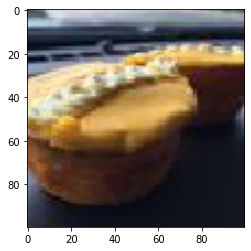

In [177]:
img=X[45]
plt.imshow(img)

In [70]:
img = image.load_img('/content/drive/My Drive/Colab Notebooks/dataset/Train Images/'+train['Image'][566],grayscale=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


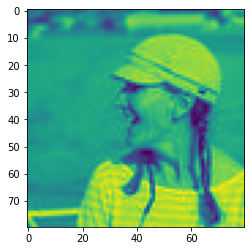

In [71]:
plt.imshow(img)

In [65]:
img.shape

AttributeError: ignored

In [0]:
for layer in vgg.layers[:8]:
  layer.trainable=False

In [191]:
x=Flatten()(vgg.output)
predictions=Dense(units=4,activation='softmax')(x)
model=Model(input=vgg.input,output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=2)

In [193]:
model.fit(X,y,epochs=25,validation_split=0.2)

Train on 4786 samples, validate on 1197 samples
Epoch 1/25
4786/4786 [==============================] - 6s 1ms/step - loss: 0.9691 - acc: 0.5938 - val_loss: 0.8604 - val_acc: 0.6650
Epoch 2/25
4786/4786 [==============================] - 4s 871us/step - loss: 0.7782 - acc: 0.6991 - val_loss: 0.8451 - val_acc: 0.6717
Epoch 3/25
4786/4786 [==============================] - 4s 869us/step - loss: 0.6975 - acc: 0.7363 - val_loss: 0.8091 - val_acc: 0.6951
Epoch 4/25
4786/4786 [==============================] - 4s 868us/step - loss: 0.6347 - acc: 0.7578 - val_loss: 0.8651 - val_acc: 0.6675
Epoch 5/25
4786/4786 [==============================] - 4s 871us/step - loss: 0.5997 - acc: 0.7725 - val_loss: 0.8732 - val_acc: 0.6466
Epoch 6/25
4786/4786 [==============================] - 4s 870us/step - loss: 0.5517 - acc: 0.7890 - val_loss: 0.8159 - val_acc: 0.6859
Epoch 7/25
4786/4786 [==============================] - 4s 876us/step - loss: 0.5211 - acc: 0.8101 - val_loss: 0.8568 - val_acc: 0.6750
Ep

In [86]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0   

In [0]:
predictions_t=model.predict(XT)  

In [166]:
predictions_t

array([[3.6032912e-01, 1.1021479e-04, 5.0818735e-01, 1.3137327e-01],
       [2.7330923e-01, 4.9398566e-04, 7.2599977e-01, 1.9710528e-04],
       [5.5135144e-03, 1.0591112e-04, 8.7952584e-01, 1.1485478e-01],
       ...,
       [1.3263355e-01, 1.5122347e-04, 7.9142451e-02, 7.8807282e-01],
       [8.3950086e-04, 1.3304353e-03, 1.8800663e-04, 9.9764204e-01],
       [8.5485540e-02, 9.2595683e-06, 2.9399220e-03, 9.1156536e-01]],
      dtype=float32)

In [185]:
lt2=[]
for  lt in predictions_t:
  x=0
  for i in range(len(lt)):
    if lt[i]>x:
      ind=i
      x=lt[i]
  lt2.append(ind)
print(lt2)



[2, 2, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 1, 3, 2, 2, 0, 2, 3, 0, 2, 3, 0, 0, 3, 2, 2, 0, 2, 3, 0, 0, 0, 3, 3, 0, 0, 2, 2, 1, 0, 3, 0, 0, 0, 2, 0, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 0, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 3, 3, 2, 2, 3, 2, 3, 2, 1, 0, 3, 3, 0, 2, 1, 2, 3, 0, 2, 3, 0, 0, 2, 1, 2, 3, 2, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 3, 2, 3, 3, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 3, 2, 2, 2, 2, 0, 1, 3, 2, 3, 0, 0, 2, 2, 3, 1, 2, 0, 2, 1, 2, 3, 2, 2, 2, 2, 0, 1, 3, 0, 0, 2, 2, 1, 0, 2, 0, 3, 0, 3, 0, 0, 2, 1, 2, 2, 3, 0, 2, 0, 3, 1, 1, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 0, 2, 1, 0, 0, 2, 3, 2, 2, 0, 3, 1, 3, 0, 2, 3, 2, 1, 0, 2, 2, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 0, 3, 1, 0, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 2, 0, 2, 2, 3, 2, 2, 1, 3, 2, 3, 1, 2, 3, 0, 2, 0, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 3, 1, 2, 2, 2, 0, 3, 2, 1, 2, 0, 3, 2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 

In [186]:
print(len(predictions_t))
print(len(lt2))

3219
3219


In [0]:
lt3=[]
for i in lt2:
  if i==2:
    lt3.append('Food')
  elif i==0:
    lt3.append('Attire')
  elif i==3:
    lt3.append('misc')
  else :
    lt3.append('Decorationandsignage')


In [0]:
submit=pd.DataFrame()
submit['Image']=test['Image']
submit['Class']=lt3

In [171]:
submit.head()

,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,Food
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire


In [0]:
submit.to_csv('submission4.csv',index=False)